In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
mnist = input_data.read_data_sets('MNIST/fashion-mnist')

Extracting MNIST/fashion-mnist/train-images-idx3-ubyte.gz
Extracting MNIST/fashion-mnist/train-labels-idx1-ubyte.gz
Extracting MNIST/fashion-mnist/t10k-images-idx3-ubyte.gz
Extracting MNIST/fashion-mnist/t10k-labels-idx1-ubyte.gz


mnist.describe()

In [6]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fecbf37ef28>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fecbf37ee10>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fecbf37e358>)

In [7]:
def display_image(image):
    plt.imshow(image.reshape(28,28),cmap='Greys', interpolation='nearest')

In [8]:
mnist.train.images.shape

(55000, 784)

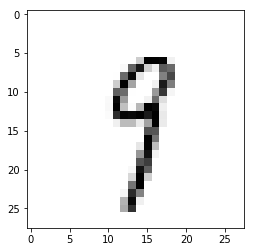

In [10]:
display_image(mnist.train.images[np.random.randint(1000)])

In [11]:
fashion = input_data.read_data_sets('FashionMNIST/fashion-mnist')

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting FashionMNIST/fashion-mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting FashionMNIST/fashion-mnist/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting FashionMNIST/fashion-mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting FashionMNIST/fashion-mnist/t10k-labels-idx1-ubyte.gz


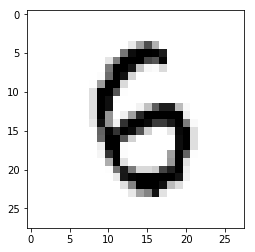

In [15]:
display_image(fashion.train.images[np.random.randint(1000)])

In [24]:
def plot_original_reconstructed(original, reconstructed):
    fig = plt.figure(figsize=(8,6))
    plt.subplot(221)
    display_image(original)
    plt.subplot(222)
    display_image(reconstructed)

In [25]:
NUM_INPUTS  = NUM_OUTPUTS = 28*28
NUM_HIDDEN1 = NUM_HIDDEN3 = 400
NUM_HIDDEN2 = 200

In [26]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, shape=[None, NUM_INPUTS])
dropout_rate = 0.3
X_drop = tf.layers.dropout(X, dropout_rate, training=True)
hidden_layer1 = tf.layers.dense(X_drop       , NUM_HIDDEN1, activation=tf.nn.relu)
hidden_layer2 = tf.layers.dense(hidden_layer1, NUM_HIDDEN2, activation=tf.nn.relu)
hidden_layer3 = tf.layers.dense(hidden_layer2, NUM_HIDDEN3, activation=tf.nn.relu)
outputs       = tf.layers.dense(hidden_layer3, NUM_OUTPUTS, activation=None)

reconstruction_loss = tf.reduce_mean(tf.square(outputs - X))
optimizer     = tf.train.AdamOptimizer(0.01)
training_op   = optimizer.minimize(reconstruction_loss)
init          = tf.global_variables_initializer()

In [27]:
n_epochs   = 10
batch_size = 150
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        n_batches = mnist.train.num_examples
        for iteration in range(n_batches):
            X_batch, _ = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict = {X: X_batch})
        loss_train     = reconstruction_loss.eval(feed_dict = {X: X_batch})
        outputs_eval   = outputs.eval(feed_dict={X:X_batch})
        print("\r{}".format(epoch), "Train MSE:", loss_train)

0 Train MSE: 0.023249453


KeyboardInterrupt: 

In [ ]:
n=50
plot_original_reconstructed(mnist.test.images[n], outputs_eval[n])